**Fidelity Calculation Using One Sample for Correctly Predicted Negative Reviews and One for Correctly Predicted Positive Review**

This notebooks is refered to results in chapter XY from the research document.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
#read the table
df = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/reults_union', 'rb'))

In [ ]:
#checking the length of each review  #mean is 50 so it is a good choice
df['pad_50_sen'] = df['clean_review'].apply(lambda x : ' '.join(x.strip().split(" ")[:50]))

In [ ]:
#get the index of all reviews that contain the most significant words
def find_reviews (word_looking_for, test_sentences_sample):
    reviews_with_word =  []
    for index, review in enumerate(test_sentences_sample):
        a = review
        split = a.split()
        for word in split:
            if word == word_looking_for:
                reviews_with_word.append(index)
                break
    return reviews_with_word

In [ ]:
#add all index-es in a array #delicious, great, amazing, awesome, excellent, best, definitely, love, favorite, perfect

import itertools
test_sentences_sample = df.pad_50_sen.astype(str)
word_looking_for = ['delicious','great', 'excellent'] #['not','worst', 'disappointing']
result_index = []

for word in word_looking_for:
  res = find_reviews(word, test_sentences_sample)
  result_index.append(res)   

In [ ]:
a = result_index[0]
b = result_index[1]
list1_as_set = set(a)
intersection = list1_as_set.intersection(b)

c = intersection
d = result_index[2]
list1_as_set = set(c)
intersection = list1_as_set.intersection(d)

print(intersection)

{3145, 1291, 2124, 3031, 3356}


In [ ]:
df = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/reults_union', 'rb'))
df.iloc[3356]

text                 Took a break from this place, just started goi...
categories           Italian, Restaurants, Specialty Food, American...
length                                                              66
clean_review         took break place started going seen great impr...
y_true                                                               1
y_pred_cnn                                                           1
y_pred_lstm                                                          1
y_pred_bert                                                          1
y_pred_bert_keras                                                    1
Name: 3356, dtype: object

In [ ]:
#{1276, 405, 1374, 2047} ---neg
#{3145, 1291, 2124, 3031, 3356} ---pos
#{2436, 423, 3703, 3145, 3178, 4046, 3442, 3031, 472, 2073, 3419, 3293}

**Ranking difference for all XAI methods**

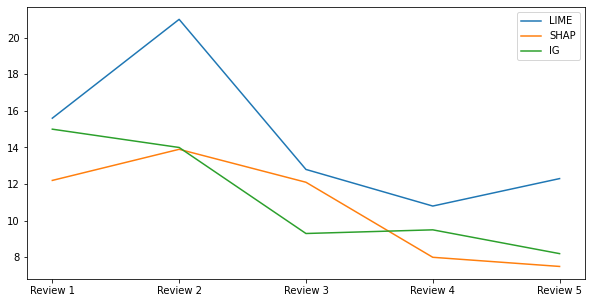

In [ ]:
#positive reviews
import matplotlib.pyplot as plt
import pandas

d = {'Explainer': ['LIME', 'LIME', 'LIME', 'LIME', 'LIME','SHAP', 'SHAP','SHAP','SHAP','SHAP','IG','IG','IG','IG','IG' ],
     'Review': ['Review 1', 'Review 2', 'Review 3', 'Review 4', 'Review 5', 'Review 1', 'Review 2', 'Review 3', 'Review 4', 'Review 5', 'Review 1', 'Review 2', 'Review 3', 'Review 4', 'Review 5'],
     'Ranking Difference': [15.6, 21, 12.8, 10.8, 12.3,   12.2, 13.9, 12.1, 8, 7.5,    15, 14, 9.3, 9.5, 8.2]}
df = pandas.DataFrame(data=d)

explainer_set = set(df['Explainer'])

plt.figure(figsize=(10,5))
for explainer in explainer_set:
     selected_data = df.loc[df['Explainer'] == explainer]
     plt.plot(selected_data['Review'], selected_data['Ranking Difference'], label=explainer)

     
plt.legend()
plt.show()

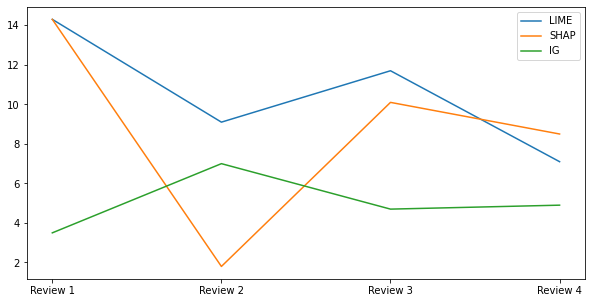

In [ ]:
#negative reviews
import matplotlib.pyplot as plt
import pandas

d = {'Explainer': ['LIME', 'LIME', 'LIME', 'LIME','SHAP','SHAP','SHAP','SHAP','IG','IG','IG','IG' ],
     'Review': ['Review 1', 'Review 2', 'Review 3', 'Review 4', 'Review 1', 'Review 2', 'Review 3', 'Review 4', 'Review 1', 'Review 2', 'Review 3', 'Review 4'],
     'Ranking Difference': [14.3, 9.1, 11.7, 7.1,   14.3, 1.8, 10.1, 8.5,   3.5, 7, 4.7, 4.9]}
df = pandas.DataFrame(data=d)

explainer_set = set(df['Explainer'])

plt.figure(figsize=(10,5))
for explainer in explainer_set:
     selected_data = df.loc[df['Explainer'] == explainer]
     plt.plot(selected_data['Review'], selected_data['Ranking Difference'], label=explainer)

     
plt.legend()
plt.show()